# Sample Lecture - R

<a href="https://hydrocode.de" target="_blank">
<img src="https://firebasestorage.googleapis.com/v0/b/hydrocode-website.appspot.com/o/public%2Fhydrocode_brand.png?alt=media"  style="height: 60px; float: left"/></a>

## Overview

This is a short and quick presentation of the available elements, which can be used to build up your lecture notes.

The big advantage is, that you have to build the document only once. You can include code, models, algorithms you are 
currently working on. Enrich them with notes and explanations for your students. 

Once, it's time for lectures you just need to mark which elements should be included into the presentation and commit the 
changes to github. [Notebook-Classroom](https://github.com/hydrocode-de/notebook-classroom) will take care of the rest.

You will notice that this cell will be ignored in the presentation, because it's slide type was set to ``skip``. 
The next cell will import some important packages. If you use interactive plots, like Bokeh or plotly, you generally need to mark
these cells as ``notes``. The difference is that these cells will not be shown, but *included* (as notes in presentation mode), whereas 
``skip`` cells will be *removed*.

In [2]:
library(ggplot2)
library(gridExtra)
library(vembedr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


## Text Formatting

With markdown its **easy** to format text like *italics* or _**bold and italics**_.

By leaving a blank line, a new paragraph is started. Some inline $math^3_{i,j}$ can be added easily. Of course it's also possible to put formulas into their own line.
$$E=mc^2$$
See the source for this formatted cell below:

```
With markdown its **easy** to format text like *italics* or _**bold and italics**_.

By leaving a blank line, a new paragraph is started. Some inline $math^3_{i,j}$ can be added easily. Of course it's also possible to put formulas into their own line.
$$E=mc^2$$
See the source for this formatted cell below:
```

## Code

It is also possible to include code that is not meant to be run (which would go into a code cell then). Most programming languages will be syntax-highlighed when included.

```python
print('Like Python')
```

```r
v <- "But also R"
```

```c++
cout << sprintf(buffer, "C++ is also %s", "known") << endl;
```

### More, More, More

of course there is way more. You will find some pretty good cheat-sheets out there: e.g. [this one](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

## Running Code

The main advantage of using jupyter notebooks is obviously the ability to run code. We can perform calculations and explore the result interactively with the students. These cells even make it possible for students, who have never programed to change existing code with ease.

We will generate some $(x, y)$ tuples with $0 < x < 2\pi$ and 
$$ y = sin(x) + r $$
where $r$ is a random number $-0.1 < r < 0.1$

In [3]:
# generate some data
x <- seq(0, 2*pi, length.out=100)

# sine
y <- sin(x) + runif(100, -.1, .1)

The notebook will render any output to StdOut and StdErr.

In [4]:
y

[1]  0.07389255  0.02681455  0.14516644  0.12947404  0.25405859  0.36899307
  [7]  0.43949123  0.34006296  0.47478449  0.63049229  0.59860358  0.60741563
 [13]  0.71765990  0.72895909  0.70688451  0.84438562  0.79319283  0.81022127
 [19]  0.93574127  0.94124747  1.05252211  1.02970304  1.02449572  0.97897224
 [25]  1.06425958  0.95461143  0.90617519  1.05127308  1.04314039  0.99123780
 [31]  0.84859795  0.91351774  0.88921122  0.85146105  0.76934757  0.86180855
 [37]  0.69325788  0.72404544  0.66944935  0.52372104  0.64152230  0.61307752
 [43]  0.36099388  0.35930295  0.28469691  0.29341142  0.15670082  0.08095918
 [49]  0.01265286 -0.01631263  0.04825101 -0.05557059 -0.12431426 -0.16444980
 [55] -0.20725635 -0.27765820 -0.42904757 -0.41434263 -0.50494665 -0.65375404
 [61] -0.63359083 -0.70949006 -0.75260575 -0.84479341 -0.77306961 -0.80137518
 [67] -0.93403097 -0.80872253 -0.85628094 -0.96539434 -0.93222201 -0.89385712
 [73] -0.97164272 -1.06723937 -1.00198084 -0.95479203 -1.00888801 -0.90551816
 [79] -1.05813407 -1.00674398 -0.83868389 -0.90979424 -0.96549889 -0.85202006
 [85] -0.80172423 -0.68969019 -0.65539135 -0.71185358 -0.66035981 -0.53111623
 [91] -0.49958050 -0.49263691 -0.34948538 -0.40531390 -0.40756837 -0.25695804
 [97] -0.14093433 -0.12600690  0.01717087 -0.09138333

## Plotting

The maybe coolest feature is the ability to directly inject and show plots.
The standard R plotting library is right away available and whenever a 
plotting object is passed to StdOut, the notebook will render it

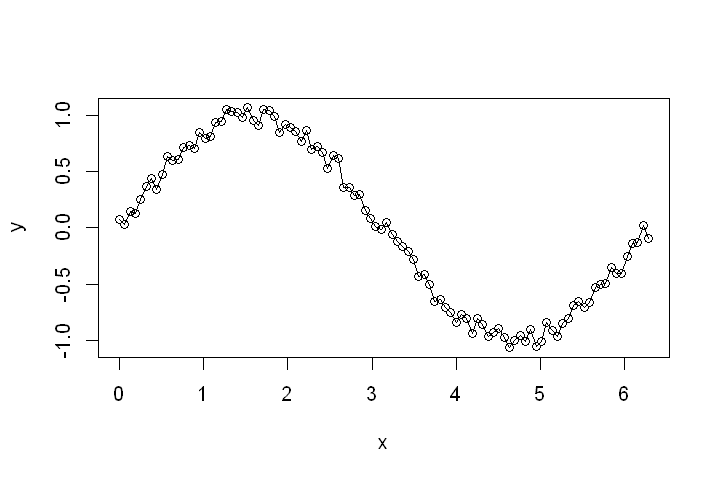

In [11]:
options(repr.plot.width=6, repr.plot.height=4)
plot(x, y, type="o")

In [13]:
df <- data.frame(x, y, sin(x) - y)
names(df) <- c('x', 'y', 'd')
p1 <- ggplot(df, aes(x=x, y=y)) + 
        geom_line(color="red")
p2 <- ggplot() + 
    geom_bar(data=df, aes(x=x, y=d), stat="identity", 
             fill="blue", show.legend=F, width=0.02)

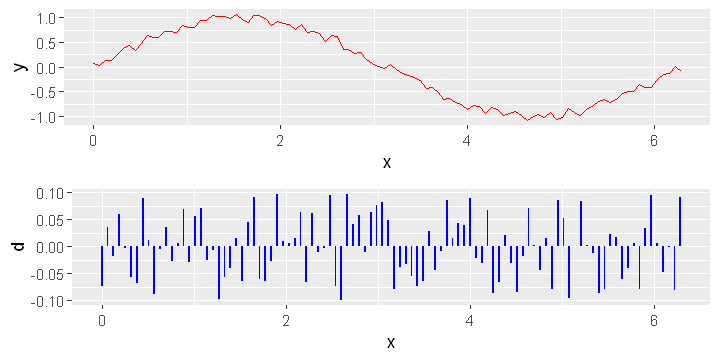

In [15]:
options(repr.plot.width=6, repr.plot.height=3)
grid.arrange(p1, p2, nrow=2)

## Videos

Sometimes it's very helpful to include a video into a notebook. There are various ways how to do that. 
As Notebooks are capable of rendering HTML tags, you can include the video using a ordinary ``iframe``. This is however not a good idea, as many Markdown processors will exclude tags like ``<script>``, ``<style>`` or ``<iframe>`` from the markdown source before rendering it.
Thus, we need the ``vembedr`` package

In [7]:
embed_youtube('XTsaZRKx9UI', width=840, height=450) %>% use_start_time("5s")

Shiny tags cannot be represented in plain text (need html)

## Tables

There are many way to include tables. You can use Markdown markup to create tables. You can use HTML ``<table>`` tags. This is both fine, but a  lot of work if you need to create large tables. 

The third option is to use code cells to render tables. I.e. ``data.frame`` objects will render to tables if you print them to StdOut. This way you can keep the table data in a csv and read and render it in a one-liner.

### Markdown

This table:

| head 1 | head 2 | head 3 |
|--------|--------|--------|
| cell 1 | cell 2 | cell 3 |
| cell 4 | cell 5 | cell 6 |
| cell 7 | cell 8 | cell 9 |

can be created like:

```
| head 1 | head 2 | head 3 |
|--------|--------|--------|
| cell 1 | cell 2 | cell 3 |
| cell 4 | cell 5 | cell 6 |
| cell 7 | cell 8 | cell 9 |
```

### HTML

The same as HTML table:

<table>
    <tr><th>head 1</th><th>head 2</th><th>head 3</th></tr>
    <tr><td>cell 1</td><td>cell 2</td><td>cell 3</td></tr>
    <tr><td>cell 4</td><td>cell 5</td><td>cell 6</td></tr>
    <tr><td>cell 7</td><td>cell 8</td><td>cell 9</td></tr>
</table>

can be created like:

```html
<table>
    <tr><th>head 1</th><th>head 2</th><th>head 3</th></tr>
    <tr><td>cell 1</td><td>cell 2</td><td>cell 3</td></tr>
    <tr><td>cell 4</td><td>cell 5</td><td>cell 6</td></tr>
    <tr><td>cell 7</td><td>cell 8</td><td>cell 9</td></tr>
</table>

```

### R

In [8]:
df

x,y,d
0.00000000,0.09143467,-0.091434666
0.06346652,0.13535489,-0.071930972
0.12693304,0.04129533,0.085297119
0.19039955,0.12169554,0.067555701
0.25386607,0.18774865,0.063399342
0.31733259,0.38518954,-0.073156093
0.38079911,0.40691284,-0.035250381
0.44426563,0.49336156,-0.063566653
0.50773215,0.39581733,0.090379410
0.57119866,0.47730092,0.063339899
